# Contours & Figure Aesthetics

We follow the `gsn_contour_x.ncl` examples, which are described as included here. There are not always direct analogies, but we cover the same basic plotting features.
```
;================================================;
;  gsn_contour_1.ncl
;================================================;
;
; Concepts illustrated:
;   - Drawing a basic contour plot using gsn_contour
;================================================;
;
;================================================;
;  gsn_contour_2.ncl
;================================================;
; Concepts illustrated:
;   - Drawing a basic contour plot using gsn_contour
;   - Spanning the full color map for contour fill
;   - Turning on color fill for a contour plot
;   - Turning off contour line labels
;   - Turning off the contour informational label
;   - Changing the size/shape of a contour plot using viewport resources
;   - Increasing the size of tickmark labels
;
;================================================;
;
;================================================;
;  gsn_contour_3.ncl
;================================================;
; Concepts illustrated:
;   - Drawing a basic contour plot using gsn_contour
;   - Turning on a labelbar for a contour plot
;   - Customizing a labelbar for a contour plot
;   - Changing the font size of the labelbar's labels
;   - Changing the width and height of a labelbar
;   - Making the labelbar be horizontal
;   - Turning off the perimeter around a labelbar
;   - Moving the labelbar away from the plot
;
;================================================;
;
```

NCL's `gsn_contour_2.ncl` just gets some data, adds color, and changes the aspect ratio.

In python with xarray and matplotlib, we can replicate this. In the following, we show how to load the data as an xarray dataset, get the variable (`u`) as an xarray DataArray, and the plot one of the time slices. 

In the notebook environment, you can do a quick view plot without setting resources or even creating Figure and Axes objects. We show this approach for an unfilled contour with `plt.contour(u)`. This is the most basic and generic contour plot. Notice that teh aspect ratio is actually `equal` in data space, with the height being 30 units and the width being 50 units because those are the dimension sizes of `u`.

Then we "add color" by just changing from `contour` to `contourf.`

The NCL example uses a width of 0.8 and a height of 0.4, so in the next version, we set the figsize kwarg to a 2:1 aspect. We do it two ways; the first uses `gcf` to name the figure object (that was implicit). The second way (which I think is better) starts by defining the figure object and then uses it to make axes and draw the chart. The overall look is more stretched horizontally than in NCL; I am not sure exactly why, but I think it might be because here we are manipulating the aspect of the axes while in NCL the example is changing the _viewport_ aspect (includes ticks etc?).

Along the way, I also show how to control the colorbar in matplotlib in various ways. One thing to keep in mind is that the colorbar is really just another Axes object that can be manipulated in every way that a regular Axes can, but sometimes it can be a little hard to get down to those basic elements because they are wrapped up in a colorbar. Since these are minor cosmetic things, we also include dealing with fonts all aroud the figure, just to show how to set them to be bold and different sizes. Again, all the text really comes down to basic text elements, but they can be wrapped into other objects, making it a little hard to just get to the basic properties. 

In [17]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
f = xr.open_dataset("/Users/brianpm/Documents/www.ncl.ucar.edu/Applications/Data/cdf/cone.nc")
u = f['u'][4,:,:]

In [3]:
u

<xarray.DataArray 'u' (lon: 30, lat: 50)>
array([[1.903023, 1.188416, 0.670549, ..., 2.838402, 1.903023, 1.188416],
       [2.434255, 1.528818, 0.887603, ..., 3.578126, 2.434255, 1.528818],
       [2.851014, 1.804175, 1.076365, ..., 4.13533 , 2.851014, 1.804175],
       ...,
       [1.284787, 0.792243, 0.43754 , ..., 1.973387, 1.284787, 0.792243],
       [1.903023, 1.188416, 0.670549, ..., 2.838402, 1.903023, 1.188416],
       [2.434255, 1.528818, 0.887603, ..., 3.578126, 2.434255, 1.528818]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 45.0 46.0 47.0 48.0 49.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 25.0 26.0 27.0 28.0 29.0
    time     float32 1200.0
Attributes:
    long_name:  Cone amplitude
    units:      ndim

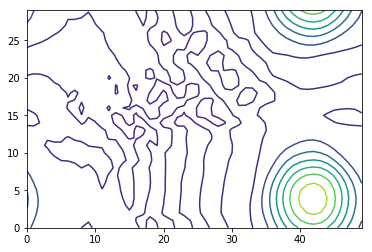

In [4]:
plt.contour(u)

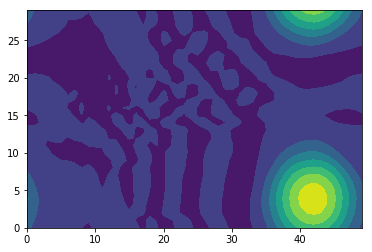

In [5]:
plt.contourf(u)

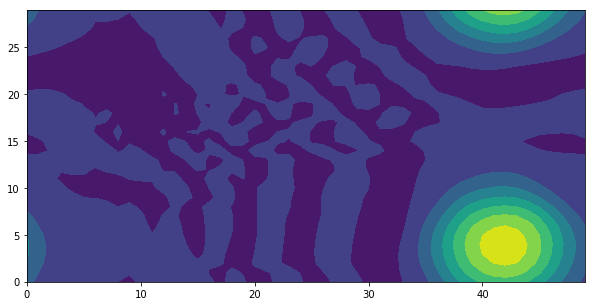

In [7]:
plt.contourf(u)
fig = plt.gcf()  # this sets a variable `fig` by running `gcf` (get current figure)
fig.set_size_inches(10,5)  # set the size of the figure

Text(0.5, 1.0, 'Cone amplitude')

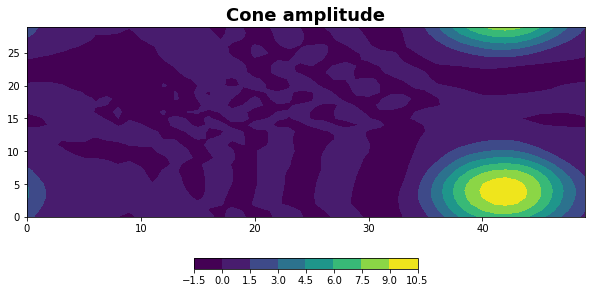

In [19]:
# myLevels = np.arange(11)  # for explicit level definition
# But ... default behavior by matplotlib is to not plot the data outside the
# levels, whereas NCL will color above and below the min/max.
# To better replicate that behavior, just provide a color normalization
# without specifying the levels.
myNorm = mpl.colors.Normalize(vmin=0, vmax=10)

fig, ax = plt.subplots(figsize=(10,5))  # makes `fig` (Figure Object) and `ax` (Axes Object)
img = ax.contourf(u, norm=myNorm)  # makes `img` by applying the `contourf` method of `ax`
fig.colorbar(img, orientation='horizontal', shrink=0.4)  # include a colorbar called `cb`, and make it horizontal
ax.set_title("Cone amplitude", fontsize=18, fontweight='bold')

The `shrink` kwarg in `colorbar` is used to reduce the colorbar's size from the default. This is convenient, and works well most of the time. If for some reason you need to have more control over the colorbar properties, it is possible to customize everything about it. Here I'll show an example that sets the size and the font labels differently, to give a sense.

[Text(0, 0, 'Under'),
 Text(0, 0, 'Nominal'),
 Text(0, 0, 'Warning'),
 Text(0, 0, 'Critical')]

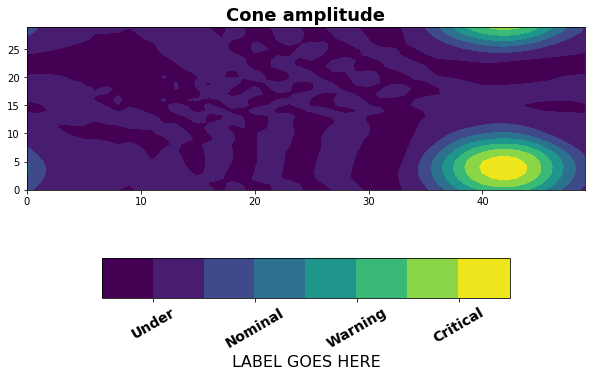

In [59]:
fig, ax = plt.subplots(figsize=(10,5))  # makes `fig` (Figure Object) and `ax` (Axes Object)
img = ax.contourf(u, norm=myNorm)  # makes `img` by applying the `contourf` method of `ax`
ax.set_title("Cone amplitude", fontsize=18, fontweight='bold')
cb = fig.colorbar(img, orientation='horizontal', aspect=10, pad=0.25)  # include a colorbar called `cb`, and make it horizontal
cb.set_label("LABEL GOES HERE", fontsize=16)
cb.set_ticks([0, 3, 6, 9])
cb.ax.tick_params(labelsize=14) #, weight='bold', angle=33)
cb.ax.set_xticklabels(["Under", "Nominal", "Warning", "Critical"],fontdict={"fontweight":"bold", "rotation":30})


If you really, really need to directly and precisely control the position of the colorbar, you can assign a new axes object exactly where you want.

We can also make lines thicker and fonts bold all around.

I'll also turn off the `figsize` kwarg since it looks better without it.

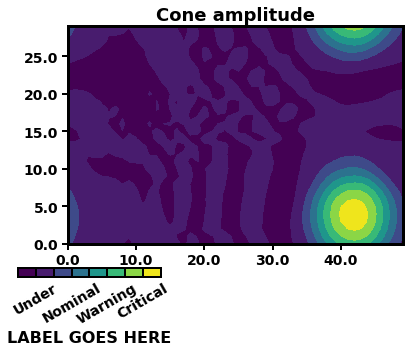

In [94]:
fig, ax = plt.subplots()  # makes `fig` (Figure Object) and `ax` (Axes Object)
img = ax.contourf(u, norm=myNorm)  # makes `img` by applying the `contourf` method of `ax`
ax.set_title("Cone amplitude", fontsize=18, fontweight='bold')
[i[1].set_linewidth(3) for i in ax.spines.items()]  # Loop over all 4 spines; items is a tuple, and the spine object is the 2nd element
ax.tick_params(axis='both', width=2, length=6, labelsize=14,)
ax.set_xticklabels(ax.get_xticks(), weight='bold')
ax.set_yticklabels(ax.get_yticks(), weight='bold')
# note: we could have made everything bold with rcparams to change defaults, but this works fine.
cbax = fig.add_axes([0.01, 0.01, 0.33, 0.03]) 
cb = fig.colorbar(img, cax=cbax, orientation='horizontal', aspect=10, pad=0.25, drawedges=True)  # include a colorbar called `cb`, and make it horizontal
cb.set_label("LABEL GOES HERE", fontsize=16, fontweight='bold')
cb.set_ticks([0, 3, 6, 9])
cb.ax.tick_params(direction='in',labelsize=14) #, weight='bold', angle=33)
cb.ax.set_xticklabels(["Under", "Nominal", "Warning", "Critical"],fontdict={"fontweight":"bold", "rotation":30})
cb.dividers.set_linewidth(2)
cb.outline.set_linewidth(2)
